# Importing Libraries

In [97]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# Web Scraping from Wikipedia

In [100]:
url = "https://en.wikipedia.org/wiki/List_of_American_films_of_2023"

headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept-Language": "en-US,en;q=0.9"
}

response = requests.get(url, headers=headers)
print("Status Code:", response.status_code)

soup = BeautifulSoup(response.text, "html.parser")
tables = soup.find_all("table", class_="wikitable")
print("Tables found:", len(tables))


Status Code: 200
Tables found: 5


# Extracting All Movie Tables & Combine

In [103]:
movie_tables = []

for idx, table in enumerate(tables):
    table_html = StringIO(str(table))
    df = pd.read_html(table_html)[0]
    df["Quarter"] = f"Table {idx+1}"
    movie_tables.append(df)

movies_df = pd.concat(movie_tables, ignore_index=True)
print(movies_df.shape)
movies_df.head()


(354, 10)


,Rank,Title,Distributor,Domestic gross,Quarter,Opening,Opening.1,Production company,Cast and crew,Ref.
0,1.0,Barbie,Warner Bros.,"$636,236,401",Table 1,NaN,NaN,NaN,NaN,NaN
1,2.0,The Super Mario Bros. Movie,Universal,"$574,934,330",Table 1,NaN,NaN,NaN,NaN,NaN
2,3.0,Spider-Man: Across the Spider-Verse,Sony,"$381,593,754",Table 1,NaN,NaN,NaN,NaN,NaN
3,4.0,Guardians of the Galaxy Vol. 3,Disney,"$358,995,815",Table 1,NaN,NaN,NaN,NaN,NaN
4,5.0,Oppenheimer,Universal,"$329,862,540",Table 1,NaN,NaN,NaN,NaN,NaN


# Cleaning Column Names

In [107]:
movies_df.columns = movies_df.columns.str.replace("\n", "").str.strip()
movies_df.head()


,Rank,Title,Distributor,Domestic gross,Quarter,Opening,Opening.1,Production company,Cast and crew,Ref.
0,1.0,Barbie,Warner Bros.,"$636,236,401",Table 1,NaN,NaN,NaN,NaN,NaN
1,2.0,The Super Mario Bros. Movie,Universal,"$574,934,330",Table 1,NaN,NaN,NaN,NaN,NaN
2,3.0,Spider-Man: Across the Spider-Verse,Sony,"$381,593,754",Table 1,NaN,NaN,NaN,NaN,NaN
3,4.0,Guardians of the Galaxy Vol. 3,Disney,"$358,995,815",Table 1,NaN,NaN,NaN,NaN,NaN
4,5.0,Oppenheimer,Universal,"$329,862,540",Table 1,NaN,NaN,NaN,NaN,NaN


# Data Cleaning & Feature Engineering

In [110]:
# Fix Opening (release day)
movies_df["Opening"] = movies_df["Opening"].astype(str).str.replace("O C T O B E R", "", regex=False)
movies_df["Opening"] = movies_df["Opening"].str.strip()

# Extract Release Month
movies_df["Month"] = movies_df["Opening.1"].astype(str).str.extract(r"([A-Za-z]+)")

# Extract Year if missing
movies_df["Year"] = 2023

# Replace missing values
movies_df.fillna("N/A", inplace=True)

movies_df.head()


C:\Users\Goutham\AppData\Local\Temp\ipykernel_7172\417398979.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  movies_df.fillna("N/A", inplace=True)


,Rank,Title,Distributor,Domestic gross,Quarter,Opening,Opening.1,Production company,Cast and crew,Ref.,Month,Year
0,1.0,Barbie,Warner Bros.,"$636,236,401",Table 1,nan,N/A,N/A,N/A,N/A,nan,2023
1,2.0,The Super Mario Bros. Movie,Universal,"$574,934,330",Table 1,nan,N/A,N/A,N/A,N/A,nan,2023
2,3.0,Spider-Man: Across the Spider-Verse,Sony,"$381,593,754",Table 1,nan,N/A,N/A,N/A,N/A,nan,2023
3,4.0,Guardians of the Galaxy Vol. 3,Disney,"$358,995,815",Table 1,nan,N/A,N/A,N/A,N/A,nan,2023
4,5.0,Oppenheimer,Universal,"$329,862,540",Table 1,nan,N/A,N/A,N/A,N/A,nan,2023


# Exploratory Data Analysis

# % of Domestic gross by Movie Title

In [135]:
movies_df.dtypes

Rank                  object
Title                 object
Distributor           object
Domestic gross        object
Quarter               object
Opening               object
Opening.1             object
Production company    object
Cast and crew         object
Ref.                  object
Month                 object
Year                   int64
dtype: object

In [141]:
# Remove $ and , then convert to numeric, setting errors='coerce' to convert invalid values to NaN
movies_df["Domestic gross_clean"] = (
    movies_df["Domestic gross"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

# Convert to numeric, invalid parsing becomes NaN
movies_df["Domestic gross_clean"] = pd.to_numeric(movies_df["Domestic gross_clean"], errors="coerce")

# Optional: fill NaN with 0 if you want
movies_df["Domestic gross_clean"].fillna(0, inplace=True)

# Now you can sum safely
total_domestic = movies_df["Domestic gross_clean"].sum()
print(total_domestic)


3383985301.0


C:\Users\Goutham\AppData\Local\Temp\ipykernel_7172\2105203053.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_df["Domestic gross_clean"].fillna(0, inplace=True)


In [143]:
movies_df

,Rank,Title,Distributor,Domestic gross,Quarter,Opening,Opening.1,Production company,Cast and crew,Ref.,Month,Year,Domestic gross_clean
0,1.0,Barbie,Warner Bros.,"$636,236,401",Table 1,nan,N/A,N/A,N/A,N/A,nan,2023,636236401.0
1,2.0,The Super Mario Bros. Movie,Universal,"$574,934,330",Table 1,nan,N/A,N/A,N/A,N/A,nan,2023,574934330.0
2,3.0,Spider-Man: Across the Spider-Verse,Sony,"$381,593,754",Table 1,nan,N/A,N/A,N/A,N/A,nan,2023,381593754.0
3,4.0,Guardians of the Galaxy Vol. 3,Disney,"$358,995,815",Table 1,nan,N/A,N/A,N/A,N/A,nan,2023,358995815.0
4,5.0,Oppenheimer,Universal,"$329,862,540",Table 1,nan,N/A,N/A,N/A,N/A,nan,2023,329862540.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,N/A,Memory,N/A,N/A,Table 5,D E C E M B E R,22.0,Ketchup Entertainment / Mubi,Michel Franco (director/screenplay); Jessica C...,[327],N/A,2023,0.0
350,N/A,The Color Purple,N/A,N/A,Table 5,D E C E M B E R,25.0,Warner Bros. Pictures / Amblin Entertainment /...,"Blitz Bazawule (director), Marcus Gardley (scr...",[328],N/A,2023,0.0
351,N/A,The Boys in the Boat,N/A,N/A,Table 5,D E C E M B E R,25.0,Metro-Goldwyn-Mayer / Smokehouse Pictures,"George Clooney (director), Mark L. Smith (scre...",[329],N/A,2023,0.0
352,N/A,Ferrari,N/A,N/A,Table 5,D E C E M B E R,25.0,Neon / STXfilms / Ketchup Entertainment,"Michael Mann (director), Troy Kennedy Martin (...",[330],N/A,2023,0.0


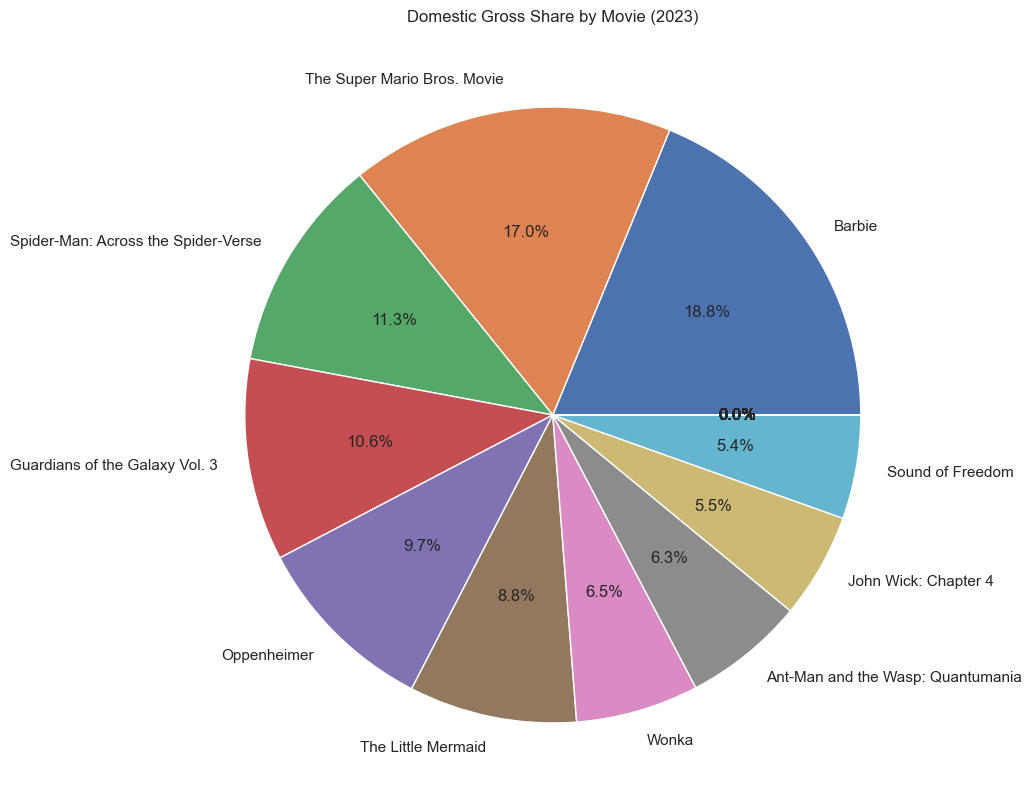

In [145]:
year = 2023
df_year = movies_df[movies_df["Year"] == year]

plt.figure(figsize=(10,10))
df_year.set_index("Title")["Domestic gross_clean"].plot(
    kind="pie",
    autopct="%1.1f%%"
)
plt.ylabel("")
plt.title(f"Domestic Gross Share by Movie ({year})")
plt.show()


# Top Production Companies (Based on Count)

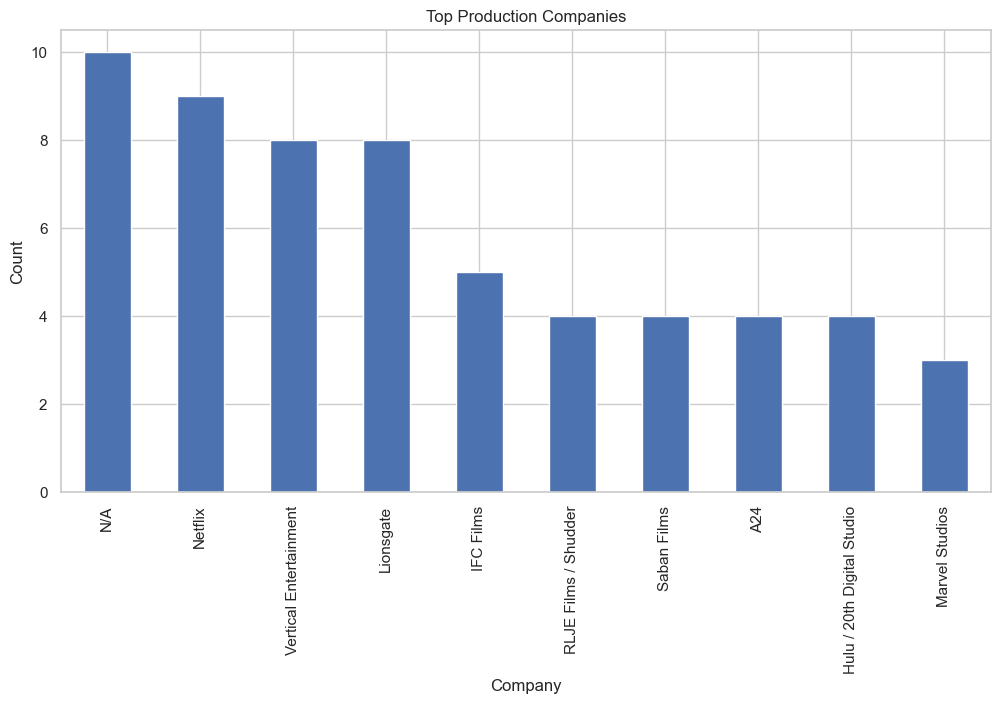

In [150]:
prod_counts = movies_df["Production company"].value_counts().head(10)

plt.figure(figsize=(12,6))
prod_counts.plot(kind="bar")
plt.title("Top Production Companies")
plt.xlabel("Company")
plt.ylabel("Count")
plt.show()


# Insights Summary

In [160]:
print("Total Movies:", len(movies_df))
print("\nMovies per Month:\n", movies_df["Month"].value_counts())
print("\nTop Production Companies:\n", prod_counts)


Total Movies: 354

Movies per Month:
 Month
N/A    344
nan     10
Name: count, dtype: int64

Top Production Companies:
 Production company
N/A                           10
Netflix                        9
Vertical Entertainment         8
Lionsgate                      8
IFC Films                      5
RLJE Films / Shudder           4
Saban Films                    4
A24                            4
Hulu / 20th Digital Studio     4
Marvel Studios                 3
Name: count, dtype: int64


# Exporting The CleanedDataset to CSV

In [164]:
movies_df.to_csv("american_movies_2023_clean.csv", index=False)
print("File saved successfully!")


File saved successfully!
